In [ ]:
pip install -r requirements.txt

بخش اول : فراخوانی کتابخانه های مورد نیاز

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import arabic_reshaper #برای نوشتار فارسی در نمودار ها
from bidi.algorithm import get_display #برای نوشتار فارسی در نمودار ها

# Import necessary modules
from sklearn.model_selection import train_test_split



# Keras specific

from keras.layers import Dense
import seaborn as sns
sns.set_theme()






بخش دوم : خواندن فایل های داده های آموزش

In [ ]:
ClearWater_dataframe = pd.read_csv("ClearWater.csv")
MuddyWater_dataframe = pd.read_csv("MuddyWater.csv")

بخش سوم : آماده سازی دیتا فریم ها(آرایه چند بعدی از داده ها)
برای پردازش

In [ ]:
#تعیین کردن نام هر ستون بر اساس ردیف اول
ClearWater_dataframe.head()
MuddyWater_dataframe.head()

#ما فقط ستون هایی که باآنها کار خواهیم کرد را نگه میداریم

ClearWater_dataframe_needed = ClearWater_dataframe[['v(mls)','d(m)','Q','Ds(m)']].sort_values(by=['Ds(m)'])
MuddyWater_dataframe_needed = MuddyWater_dataframe[['v(mls)','d(m)','Q','Ds(m)','cw']].sort_values(by=['Ds(m)'])




بزرگنمایی داده ها و استاندارد سازی

In [ ]:



print("داده ها برای آب زلال:")
print(ClearWater_dataframe_needed)

print("داده ها برای آب گل آلود:")
print(MuddyWater_dataframe_needed)

داده ها برای آب زلال:
   v(mls)   d(m)       Q   Ds(m)
2    0.40  0.020  0.0024  0.0020
1    0.52  0.030  0.0047  0.0040
0    0.65  0.037  0.0072  0.0075
3    0.70  0.038  0.0080  0.0100
4    0.78  0.040  0.0094  0.0150
داده ها برای آب گل آلود:
   v(mls)   d(m)        Q   Ds(m)    cw
2    0.32  0.025  0.00240  0.0020  33.3
1    0.44  0.035  0.00462  0.0040  35.0
0    0.57  0.040  0.00680  0.0075  40.0
3    0.63  0.040  0.00760  0.0100  50.0
4    0.71  0.042  0.00900  0.0150  60.0


Clear Water => CW
Muddy Water => MW

جدا کردن داده ها برای پیش بینی و هدف(ورودی و خروجی)

In [ ]:
#clear water
CW_predict_D = ClearWater_dataframe_needed['Ds(m)'].values
CW_target_V  = ClearWater_dataframe_needed['v(mls)'].values
CW_target_dm = ClearWater_dataframe_needed['d(m)'].values
CW_target_Q  = ClearWater_dataframe_needed['Q'].values

#Muddy Water
MW_predict_D = MuddyWater_dataframe_needed['Ds(m)'].values
MW_target_V  = MuddyWater_dataframe_needed['v(mls)'].values
MW_target_dm = MuddyWater_dataframe_needed['d(m)'].values
MW_target_Q  = MuddyWater_dataframe_needed['Q'].values
MW_target_cw  = MuddyWater_dataframe_needed['cw'].values


محاسبه و جدا سازی بخش یادگیری و تست

In [ ]:
#for muddy watter
MW_D_V_X_train, MW_D_V_X_test, MW_D_V_y_train, MW_D_V_y_test =  train_test_split(MW_predict_D,MW_target_V,test_size=0.13, random_state = 2,shuffle=False)
MW_D_d_X_train, MW_D_d_X_test, MW_D_d_y_train, MW_D_d_y_test = train_test_split(MW_predict_D,MW_target_dm,test_size=0.13, random_state = 2,shuffle=True)
MW_D_Q_X_train, MW_D_Q_X_test, MW_D_Q_y_train, MW_D_Q_y_test = train_test_split(MW_predict_D,MW_target_Q,test_size=0.13, random_state = 2,shuffle=True)
MW_D_cw_X_train, MW_D_cw_X_test, MW_D_cw_y_train, MW_D_cw_y_test = train_test_split(MW_predict_D,MW_target_cw,test_size=0.13, random_state = 2,shuffle=True)

#for clear watter
CW_D_V_X_train, CW_D_V_X_test, CW_D_V_y_train, CW_D_V_y_test = train_test_split(CW_predict_D,CW_target_V,test_size=0.13, random_state = 2,shuffle=True)
CW_D_d_X_train, CW_D_d_X_test, CW_D_d_y_train, CW_D_d_y_test = train_test_split(CW_predict_D,CW_target_dm,test_size=0.13, random_state = 2,shuffle=True)
CW_D_Q_X_train, CW_D_Q_X_test, CW_D_Q_y_train, CW_D_Q_y_test = train_test_split(CW_predict_D,CW_target_Q,test_size=0.13, random_state = 2,shuffle=True)


مدل ها شبکه عصبی برای محاسبه آب ذرات معلق


In [ ]:
# Import the kera modules
from keras.layers import Input, Dense
from keras.models import Model

def create_model_V():
    # This returns a tensor. Since the input only has one column
    inputs = Input(shape=(1,))

    # a layer instance is callable on a tensor, and returns a tensor
    # To the first layer we are feeding inputs
    x = Dense(128, activation='relu')(inputs)
    # To the next layer we are feeding the result of previous call here it is h
    x = Dense(256, activation='relu')(x)
    x = Dense(256, activation='relu')(x)

    # Predictions are the result of the neural network. Notice that the predictions are also having one column.
    predictions = Dense(1)(x)

    # This creates a model that includes
    # the Input layer and three Dense layers
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['mse'])

    return model


def create_model_d():
    inputs = Input(shape=(1,))

    # a layer instance is callable on a tensor, and returns a tensor
    # To the first layer we are feeding inputs
    x = Dense(32, activation='relu')(inputs)
    # To the next layer we are feeding the result of previous call here it is h
    x = Dense(64, activation='relu')(x)
    x = Dense(64, activation='relu')(x)

    # Predictions are the result of the neural network. Notice that the predictions are also having one column.
    predictions = Dense(1)(x)

    # This creates a model that includes
    # the Input layer and three Dense layers
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['mse'])

    return model

def create_model_Q():
    inputs = Input(shape=(1,))

    # a layer instance is callable on a tensor, and returns a tensor
    # To the first layer we are feeding inputs
    x = Dense(32, activation='relu')(inputs)
    # To the next layer we are feeding the result of previous call here it is h
    x = Dense(256, activation='relu')(x)
    #x = Dense(1024, activation='relu')(x)
    #x = Dense(1024, activation='relu')(x)

    # Predictions are the result of the neural network. Notice that the predictions are also having one column.
    predictions = Dense(1)(x)

    # This creates a model that includes
    # the Input layer and three Dense layers
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['mse'])

    return model




def create_model_cw():
    inputs = Input(shape=(1,))

    # a layer instance is callable on a tensor, and returns a tensor
    # To the first layer we are feeding inputs
    x = Dense(256, activation='relu')(inputs)
    # To the next layer we are feeding the result of previous call here it is h
    x = Dense(512, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    #x = Dense(1024, activation='relu')(x)
    #x = Dense(1024, activation='relu')(x)

    # Predictions are the result of the neural network. Notice that the predictions are also having one column.
    predictions = Dense(1)(x)

    # This creates a model that includes
    # the Input layer and three Dense layers
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['mse'])

    return model

In [ ]:
# Define V by D for muddy watter
MW_calc_V_model = create_model_V()
# Define d by D for muddy watter
MW_calc_d_model = create_model_d()
# Define Q by D for muddy watter
MW_calc_Q_model = create_model_Q()
MW_calc_cw_model = create_model_cw()



آعاز یادگیری شبکه عصبی

In [ ]:
# Define V by D for clear watter
CW_calc_V_model = create_model_V()

CW_calc_d_model = create_model_d()
# Define Q by D for clear watter
CW_calc_Q_model = create_model_Q()

آغاز محاسبات برای آب دارای مواد معلق

In [ ]:

MW_calc_V_model.fit(MW_D_V_X_train, MW_D_V_y_train, epochs=1000,batch_size=1,verbose=False)
MW_calc_Q_model.fit(MW_D_Q_X_train, MW_D_Q_y_train, epochs=2000,batch_size=1,verbose=False)
MW_calc_d_model.fit(MW_D_d_X_train, MW_D_d_y_train, epochs=2000,batch_size=1,verbose=False)
MW_calc_cw_model.fit(MW_D_cw_X_train, MW_D_cw_y_train, epochs=1000,batch_size=1,verbose=False)



آغاز محاسبه برای آب زلال

In [ ]:
CW_calc_V_model.fit(CW_D_V_X_train, CW_D_V_y_train, epochs=1000,batch_size=1,verbose=False)
CW_calc_Q_model.fit(CW_D_Q_X_train, CW_D_Q_y_train, epochs=2000,batch_size=1,verbose=False)
CW_calc_d_model.fit(CW_D_d_X_train, CW_D_d_y_train, epochs=2000,batch_size=1,verbose=False)


آموزش و تست شبکه های آب ذرات معلق

In [ ]:
MW_D_V_pred_train= MW_calc_V_model.predict(MW_D_V_X_train)
MW_D_V_pred= MW_calc_V_model.predict(MW_D_V_X_test)
continue_data_V = np.arange(0.018,0.1,0.002)
continue_v_pred = MW_calc_V_model.predict(continue_data_V)
before_data_V = np.arange(0,0.002,0.001)
before_v_pred = MW_calc_V_model.predict(before_data_V)

MW_D_Q_pred_train= MW_calc_Q_model.predict(MW_D_Q_X_train)
MW_D_Q_pred= MW_calc_Q_model.predict(MW_D_Q_X_test)
continue_data_Q = np.arange(0.018,0.08,0.002)
continue_Q_pred = MW_calc_Q_model.predict(continue_data_Q)
before_data_Q = np.arange(0,0.002,0.001)
before_Q_pred = MW_calc_Q_model.predict(before_data_Q)

MW_D_d_pred_train= MW_calc_d_model.predict(MW_D_d_X_train)
MW_D_d_pred= MW_calc_d_model.predict(MW_D_d_X_test)
continue_data_d = np.arange(0.018,0.08,0.002)
continue_d_pred = MW_calc_d_model.predict(continue_data_d)
before_data_d = np.arange(0,0.002,0.001)
before_d_pred = MW_calc_d_model.predict(before_data_d)


MW_D_cw_pred_train= MW_calc_cw_model.predict(MW_D_cw_X_train)
MW_D_cw_pred= MW_calc_cw_model.predict(MW_D_cw_X_test)
continue_data_cw = np.arange(0.018,0.08,0.002)
continue_cw_pred = MW_calc_cw_model.predict(continue_data_cw)
before_data_cw = np.arange(0,0.002,0.001)
before_cw_pred = MW_calc_cw_model.predict(before_data_cw)


آموزش و تست شبکه آب زلال

In [ ]:
CW_D_V_pred_train= CW_calc_V_model.predict(CW_D_V_X_train)
CW_D_V_pred= CW_calc_V_model.predict(CW_D_V_X_test)
continue_data_V_c = np.arange(0.018,0.09,0.002)
continue_v_pred_c = CW_calc_V_model.predict(continue_data_V_c)
before_data_V_c = np.arange(0,0.002,0.001)
before_v_pred_c = CW_calc_V_model.predict(before_data_V_c)

CW_D_Q_pred_train= CW_calc_Q_model.predict(CW_D_Q_X_train)
CW_D_Q_pred= CW_calc_Q_model.predict(CW_D_Q_X_test)
continue_data_Q_c = np.arange(0.018,0.09,0.002)
continue_Q_pred_c = CW_calc_Q_model.predict(continue_data_Q_c)
before_data_Q_c = np.arange(0,0.002,0.001)
before_Q_pred_c = CW_calc_Q_model.predict(before_data_Q_c)

CW_D_d_pred_train= CW_calc_d_model.predict(CW_D_d_X_train)
CW_D_d_pred= CW_calc_d_model.predict(CW_D_d_X_test)
continue_data_d_c = np.arange(0.018,0.09,0.002)
continue_d_pred_c = CW_calc_d_model.predict(continue_data_d_c)
before_data_d_c = np.arange(0,0.002,0.001)
before_d_pred_c = CW_calc_d_model.predict(before_data_d_c)


نمابش نموداری داده ها و تست شبکه برای آب با ذرات معلق

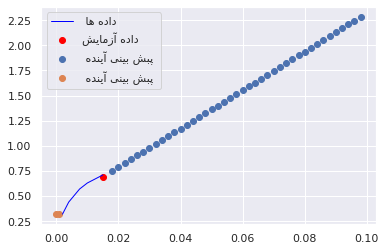

In [ ]:

plt.plot(MW_predict_D,MW_target_V,color='blue', linestyle='-', linewidth=1, label=get_display(arabic_reshaper.reshape("داده ها ")))
plt.scatter(MW_D_V_X_test,MW_D_V_pred,color="red",label =get_display(arabic_reshaper.reshape("داده آزمایش")))
plt.scatter(continue_data_V,continue_v_pred, label= get_display(arabic_reshaper.reshape(" پبش بینی آینده ")))
plt.scatter(before_data_V,before_v_pred, label= get_display(arabic_reshaper.reshape(" پبش بینی آینده ")))
plt.legend()

plt.show()

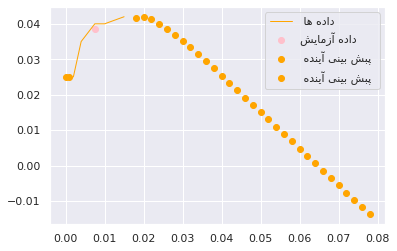

In [ ]:
plt.plot(MW_predict_D,MW_target_dm,color='orange', linestyle='-', linewidth=1, label=get_display(arabic_reshaper.reshape("داده ها ")))
plt.scatter(MW_D_d_X_test,MW_D_d_pred,color="pink",label =get_display(arabic_reshaper.reshape("داده آزمایش")))
plt.scatter(continue_data_d,continue_d_pred,color="orange", label= get_display(arabic_reshaper.reshape(" پبش بینی آینده ")))
plt.scatter(before_data_d,before_d_pred,color="orange", label= get_display(arabic_reshaper.reshape(" پبش بینی آینده ")))
plt.legend()

plt.show()

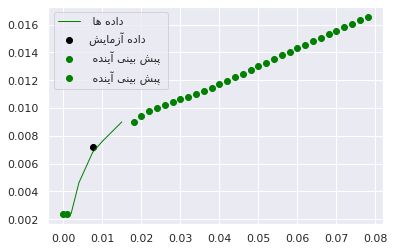

In [ ]:
plt.plot(MW_predict_D,MW_target_Q,color='green', linestyle='-', linewidth=1, label=get_display(arabic_reshaper.reshape("داده ها ")))
plt.scatter(MW_D_Q_X_test,MW_D_Q_pred,color="black",label =get_display(arabic_reshaper.reshape("داده آزمایش")))
plt.scatter(continue_data_Q,continue_Q_pred,color="green", label= get_display(arabic_reshaper.reshape(" پبش بینی آینده ")))
plt.scatter(before_data_Q,before_Q_pred,color="green", label= get_display(arabic_reshaper.reshape(" پبش بینی آینده ")))
plt.legend()

plt.show()

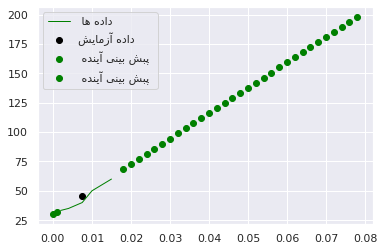

In [ ]:
plt.plot(MW_predict_D,MW_target_cw,color='green', linestyle='-', linewidth=1, label=get_display(arabic_reshaper.reshape("داده ها ")))
plt.scatter(MW_D_cw_X_test,MW_D_cw_pred,color="black",label =get_display(arabic_reshaper.reshape("داده آزمایش")))
plt.scatter(continue_data_cw,continue_cw_pred,color="green", label= get_display(arabic_reshaper.reshape(" پبش بینی آینده ")))
plt.scatter(before_data_cw,before_cw_pred,color="green", label= get_display(arabic_reshaper.reshape(" پبش بینی آینده ")))
plt.legend()

plt.show()

نمابش نموداری داده ها و تست شبکه برای آب زلال

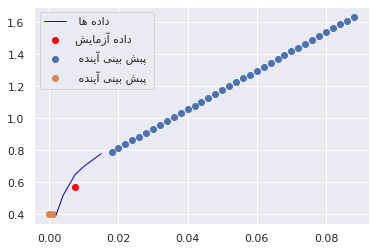

In [ ]:
plt.plot(CW_predict_D,CW_target_V,color='blue', linestyle='-', linewidth=1, label=get_display(arabic_reshaper.reshape("داده ها ")))
plt.scatter(CW_D_V_X_test,CW_D_V_pred,color="red",label =get_display(arabic_reshaper.reshape("داده آزمایش")))
plt.scatter(continue_data_V_c,continue_v_pred_c, label= get_display(arabic_reshaper.reshape(" پبش بینی آینده ")))
plt.scatter(before_data_V_c,before_v_pred_c, label= get_display(arabic_reshaper.reshape(" پبش بینی آینده ")))
plt.legend()

plt.show()

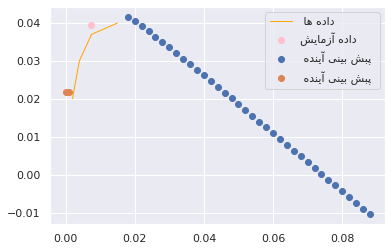

In [ ]:
plt.plot(CW_predict_D,CW_target_dm,color='orange', linestyle='-', linewidth=1, label=get_display(arabic_reshaper.reshape("داده ها ")))
plt.scatter(CW_D_d_X_test,CW_D_d_pred,color="pink",label =get_display(arabic_reshaper.reshape("داده آزمایش")))
plt.scatter(continue_data_d_c,continue_d_pred_c, label= get_display(arabic_reshaper.reshape(" پبش بینی آینده ")))
plt.scatter(before_data_d_c,before_d_pred_c, label= get_display(arabic_reshaper.reshape(" پبش بینی آینده ")))
plt.legend()

plt.show()

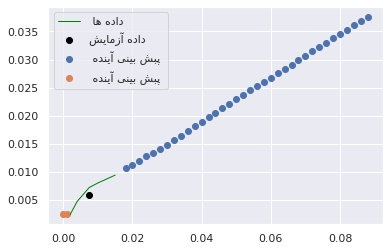

In [ ]:
plt.plot(CW_predict_D,CW_target_Q,color='green', linestyle='-', linewidth=1, label=get_display(arabic_reshaper.reshape("داده ها ")))
plt.scatter(CW_D_Q_X_test,CW_D_Q_pred,color="black",label =get_display(arabic_reshaper.reshape("داده آزمایش")))
plt.scatter(continue_data_Q_c,continue_Q_pred_c, label= get_display(arabic_reshaper.reshape(" پبش بینی آینده ")))
plt.scatter(before_data_Q_c,before_Q_pred_c, label= get_display(arabic_reshaper.reshape(" پبش بینی آینده ")))
plt.legend()
plt.show()

وارد کردن داده های تولید شده به جدول ها

In [ ]:

Muddy = pd.DataFrame({'v(mls)':np.concatenate( before_v_pred, axis=0 ).tolist()+MW_target_V.tolist()+np.concatenate( continue_v_pred, axis=0 ).tolist(),
                        'd(m)':np.concatenate( before_d_pred, axis=0 ).tolist()+MW_target_dm.tolist()+np.concatenate( continue_d_pred, axis=0 ).tolist(),
                        'Q':np.concatenate( before_Q_pred, axis=0 ).tolist()+MW_target_Q.tolist()+np.concatenate( continue_Q_pred, axis=0 ).tolist(),
                        'cw':np.concatenate( before_cw_pred, axis=0 ).tolist()+MW_target_cw.tolist()+np.concatenate( continue_cw_pred, axis=0 ).tolist(),
                        'Ds(m)':before_data_Q.tolist()+MW_predict_D.tolist()+continue_data_Q.tolist()})

Clear = pd.DataFrame({'v(mls)':np.concatenate( before_v_pred_c, axis=0 ).tolist()+CW_target_V.tolist()+np.concatenate( continue_v_pred_c, axis=0 ).tolist(),
                        'd(m)':np.concatenate( before_d_pred_c, axis=0 ).tolist()+CW_target_dm.tolist()+np.concatenate( continue_d_pred_c, axis=0 ).tolist(),
                        'Q':np.concatenate( before_Q_pred_c, axis=0 ).tolist()+CW_target_Q.tolist()+np.concatenate( continue_Q_pred_c, axis=0 ).tolist(),
                        'Ds(m)':before_data_Q_c.tolist()+CW_predict_D.tolist()+continue_data_Q_c.tolist()})

Muddy.to_excel("Muddy_ouput.xlsx","Muddy Water")
Clear.to_excel("Clear_ouput.xlsx","Clear Water")

In [ ]:

Clear


,v(mls),d(m),Q,Ds(m)
0,0.400810,0.021699,0.002397,0.0000
1,0.400810,0.021699,0.002397,0.0010
2,0.400000,0.020000,0.002400,0.0020
3,0.520000,0.030000,0.004700,0.0040
4,0.650000,0.037000,0.007200,0.0075
5,0.700000,0.038000,0.008000,0.0100
6,0.780000,0.040000,0.009400,0.0150
7,0.789772,0.041658,0.010648,0.0180
8,0.813981,0.040448,0.011223,0.0200
9,0.838162,0.039160,0.011986,0.0220


In [ ]:
Muddy

,v(mls),d(m),Q,cw,Ds(m)
0,0.317230,0.025001,0.002343,29.913177,0.0000
1,0.317230,0.025001,0.002343,32.035675,0.0010
2,0.320000,0.025000,0.002400,33.300000,0.0020
3,0.440000,0.035000,0.004620,35.000000,0.0040
4,0.570000,0.040000,0.006800,40.000000,0.0075
5,0.630000,0.040000,0.007600,50.000000,0.0100
6,0.710000,0.042000,0.009000,60.000000,0.0150
7,0.750604,0.041742,0.009027,68.610916,0.0180
8,0.788989,0.041944,0.009428,72.923584,0.0200
9,0.827332,0.041229,0.009782,77.236732,0.0220
